coefficients:  [-5.33596363e-01  7.22182538e-01  8.10585970e-01 -1.62024461e-09]
score:  0.8873564202294535


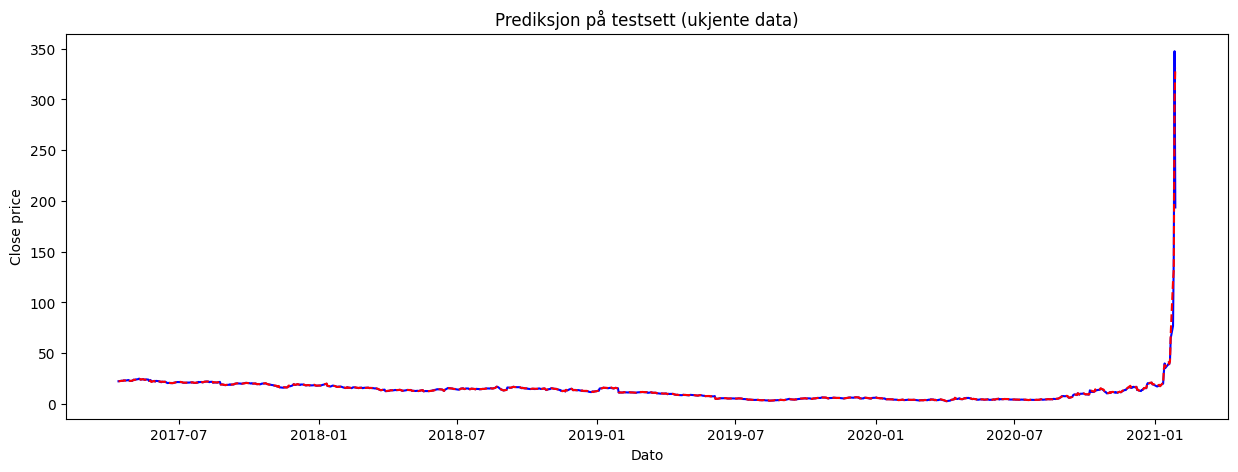

In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# lese fra GME_stocks.csv
df = pd.read_csv("GME_stock.csv")

# For å predikere fremtidige stockpris basert på historiske data, sorterer vi datasettet kronologisk etter dato
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date', ascending = True) 
df = df.reset_index(drop=True) #resetter index slik at vi går fra 0 til n etter dato og ikke etter gamle verdier

# splitter dataframe til en trainingsdata (80% av første rows, kronologisk rekkefølge) og testdata (20% av siste rows, kronologisk rekkefølge)
split = int(len(df)*0.8)
training_df = df.iloc[:split] # settet den skal lære fra
test_df = df.iloc[split:] # settet den skal predicte uten å lære fra

# lager to CSV_filer
training_df.to_csv("GME_stockTraining.csv", index=False)
test_df.to_csv("GME_stockTest.csv", index=False)

# Lin_reg modellen som skal trenes for å predikere stocks i fremtiden
lin_reg = LinearRegression()

# bruker open, low, high og volume for å predikere close
alt_train = training_df[['open_price', 'low_price', 'high_price', 'volume']]
close_actual = training_df['close_price']

# trener modellen med trainings dataframe
lin_reg.fit(alt_train, close_actual)

# lin_reg er nå trent for å predikere close price for test data framet
alt_test = test_df[['open_price', 'low_price', 'high_price', 'volume']]
close_actual_test = test_df['close_price']

# predikter close price for test data
close_pred_test = lin_reg.predict(alt_test)

# plotter resultatene
testDate = pd.to_datetime(test_df['date'])
plt.figure(figsize=(15,5))
plt.plot(testDate, close_actual_test, color='blue')
plt.plot(testDate, close_pred_test, color='red', linestyle='--')
plt.xlabel('Dato')
plt.ylabel('Close price')
plt.title('Prediksjon på testsett (ukjente data)')


# evaluering
print("coefficients: ", lin_reg.coef_) #hvor mye hver verdi påvirker resultatene (open, low, high, volume)
print("score: ", lin_reg.score(alt_test, close_actual_test)) #R2 score

Vi valgte  en regresjons algoritme siden målet er å forutsi close-verdi på aksjen. Regresjon passer best ford vi prøver å finne en kontinuerlig verdi, ikke kategori. 

Vi valgte å følge en simpel logikk, bruke: open, low, high, volum for å predikere close_verdi, siden close representerer hva aksjeprisen faktisk ender opp med å bli ved slutten av dagen.

Her ser vi resultatet med følgende verdier: 
coefficients:  [-5.33596363e-01  7.22182538e-01  8.10585970e-01 -1.62024461e-09]
score:  0.8873564202294535

Modellen fikk en score på 0.887 som betyr at den gjetter riktig 88.7% av gangene basert på variablene den ble trent opp med. Vi ser også at high & low har høyest påvirking på close-prisen og open & volum har lite/nesten ingen påvirkning på hva close prisen blir.